Name: Tom Keane

Student ID: 20214537

TASK 1 functions

In [1]:
import random
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
def yFunct(coefs, x):
    sum = 0
    for i in range(len(coefs)):
        sum += coefs[i]*x**( len(coefs) -1 - i )
    return sum

In [3]:
def jitter(y, jitter):
    return y - jitter + jitter*random.random()*2

In [4]:
def makeSampleInputs(n, xRange=10):
    inputs = []
    for i in range(n):
        x = 2*xRange*random.random() - xRange
        inputs.append(x)
    return inputs

In [5]:
def jitteryEvaluation(coefs, x, j):
    return jitter(yFunct(coefs, x), j)

In [6]:
def createTestDataPoints(coefs, jitter, xTrainingValues):
    dataPoints = []
    for x in xTrainingValues:
        y = jitteryEvaluation(coefs, x, jitter)
        dataPoints.append([x, y])
    return dataPoints

TASK 2 functions

In [7]:
def randomNPlus1thDegPolynom(coefRange=10, n=3):
    coefs = []
    for i in range(n):
        coefs.append( coefRange*( random.random()*2 - 1 ) )
    return coefs

In [8]:
def makePlotPoints(coefs_, xTrainingValues):    
    regressionPoints = []
    for x in xTrainingValues:
        regressionPoints.append([x, yFunct(coefs_, x)])
    return regressionPoints

In [9]:
def calcMeanSquaredError(realDataPoints, trainingDataPoints):
    sum = 0
    for i in range(len(trainingDataPoints)):
        sum += (trainingDataPoints[i][1] - realDataPoints[i][1])**2
    return sum/len(trainingDataPoints)

TASK 3 functions

In [10]:
def dLoss_dCoef(realDataPoints_, predictedDataPoints_, power):
    sum = 0
    for i in range(len(predictedDataPoints_)):
        xi = predictedDataPoints_[i][0]
        sum += (xi**power)*(realDataPoints_[i][1] - predictedDataPoints_[i][1])
    sum *= -2/len(realDataPoints_)
    return sum

In [11]:
def getDecreasedLossCoefs(learningRate_, guessCoefs_, realDataPoints_, initialPredictedPoints_):
    newCoefs_ = []
    for i in range(len(guessCoefs_)):
        power = len(guessCoefs_) - 1 - i
        g = dLoss_dCoef(realDataPoints_, initialPredictedPoints_, power)
        newCoefs_.append(guessCoefs_[i] - learningRate_*g)
    return newCoefs_

In [12]:
def getDecreasedLossCoefs_C(learningRate, guessCoefs, trainingDataPoints, initialPredictedPoints):
    cG = dloss_dc(trainingDataPoints, initialPredictedPoints)
    cNew = guessCoefs[2] - learningRate*cG
    return [guessCoefs[0], guessCoefs[1], cNew]

TASK 4 functions

In [13]:
def iterateLossMinimisation(minIterations_, LR_, initialGuessCoefs_, realDataPoints_, initialPredictedPoints_, targetCoef_="all"):
    losses_ = [ calcMeanSquaredError(realDataPoints_, initialPredictedPoints_) ]
    tempDecreasedLossCoefs = getDecreasedLossCoefs(LR_, initialGuessCoefs_, realDataPoints_, initialPredictedPoints_)

    loss_ =1
    n = 0
    while loss_ > 0:
        if n > 0:
            tempDecreasedLossCoefs = getDecreasedLossCoefs(LR_, currrentCoefs, realDataPoints_, currrentDecreasedLossDataPoints)

        tempDecreasedLossDataPoints = np.array( makePlotPoints(tempDecreasedLossCoefs, realDataPoints_[:,0]))
        loss_ = calcMeanSquaredError(realDataPoints_, tempDecreasedLossDataPoints)
        if  loss_ > losses_[-1]:
            if n > 0:
                return iterateLossMinimisation(minIterations_, LR_*0.5, currrentCoefs, realDataPoints_, currrentDecreasedLossDataPoints)
            else:
                return iterateLossMinimisation(minIterations_, LR_*0.5, initialGuessCoefs_, realDataPoints_, initialPredictedPoints_)
        currrentCoefs = tempDecreasedLossCoefs
        currrentDecreasedLossDataPoints = tempDecreasedLossDataPoints
        if n % minIterations**2 == 0:
            print("loss is at: "+str(loss_))
        losses_.append(loss_)
        if n > minIterations_ and  ( losses_[int( -minIterations_)] - losses_[-1] < 0.001):
            break
        n += 1
    return {"losses": losses_, "dataPoints": currrentDecreasedLossDataPoints, "coefs": currrentCoefs}

In [14]:
def cleanLossData(losses):
    return losses[:: int(len(losses)/500) ]

Performing Tasks

In [15]:
a = 2
b = 2
c = 2

coefs = [a,b,c]
j = 10
xTrainingValues = makeSampleInputs(500, 10)

realDataPoints = np.array(createTestDataPoints(coefs, j, xTrainingValues))

TASK 1

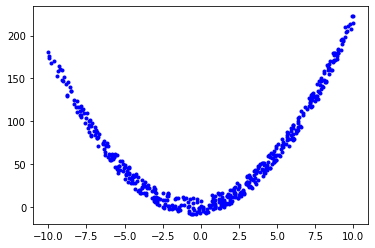

In [16]:
plt.plot(realDataPoints[:,0],realDataPoints[:,1],'.b')

TASK 2

In [17]:
coefRange = 10
initialGuessCoefs = randomNPlus1thDegPolynom(coefRange, 3)
initialPredictedPoints = np.array(makePlotPoints(initialGuessCoefs, xTrainingValues))
initialLoss = calcMeanSquaredError(realDataPoints, initialPredictedPoints)

print(str(initialLoss)+ " loss with initial coefs guess of " + str(initialGuessCoefs))

8551.225973701183 loss with initial coefs guess of [-0.32318735429031076, 9.527009748224899, 7.044499138976721]


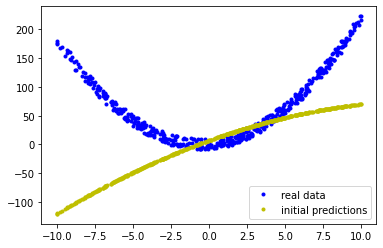

In [18]:
plt.plot(realDataPoints[:,0],realDataPoints[:,1],'.b', label='real data')
plt.plot(initialPredictedPoints[:,0],initialPredictedPoints[:,1],'.y', label="initial predictions")
plt.legend()

TASK 3

In [19]:
learningRate = 0.0001

decreasedLossCoefs = getDecreasedLossCoefs(learningRate, initialGuessCoefs, realDataPoints, initialPredictedPoints)


In [20]:
decreasedLossDataPoints = np.array(makePlotPoints(decreasedLossCoefs, xTrainingValues))

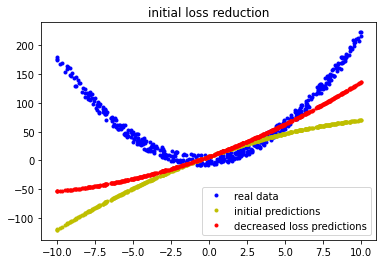

In [21]:
plt.title("initial loss reduction")
plt.plot(realDataPoints[:,0],realDataPoints[:,1],'.b', label='real data')
plt.plot(initialPredictedPoints[:,0],initialPredictedPoints[:,1],'.y', label="initial predictions")
plt.plot(decreasedLossDataPoints[:,0],decreasedLossDataPoints[:,1],'.r', label="decreased loss predictions" )
plt.legend()

In [22]:
print(str(calcMeanSquaredError(realDataPoints, initialPredictedPoints))+ " loss with initial coefs guess of " + str(initialGuessCoefs))
print(str(calcMeanSquaredError(realDataPoints, decreasedLossDataPoints))+ " decreased loss with new coefs guess of " + str(decreasedLossCoefs))

8551.225973701183 loss with initial coefs guess of [-0.32318735429031076, 9.527009748224899, 7.044499138976721]
4810.988697076443 decreased loss with new coefs guess of [0.34393986467065507, 9.499625991017345, 7.056112097660036]


task 4

This starts off with a high learning rate (LR), which then reduces until a loss reduction occurs. If at any iteration, the loss fails reduce, the LR is then reduced again.

This process will iterate until a minimum loss has been reached, such that continuing the process is redundant.

I've also decided to keep logging 

In [23]:
learningRate = 0.1
minIterations = 100
lossMinimisationData = iterateLossMinimisation(minIterations, learningRate, decreasedLossCoefs, realDataPoints, decreasedLossDataPoints)
decreasedLossDataPoints = lossMinimisationData["dataPoints"]
losses = lossMinimisationData["losses"]
reducedLossCoefs = lossMinimisationData["coefs"]
lossMinimisationData = None

loss is at: 1825.972701167773


In [24]:
print(str(len(losses))+" loss reductions")
losses = cleanLossData(losses)

9918 loss reductions


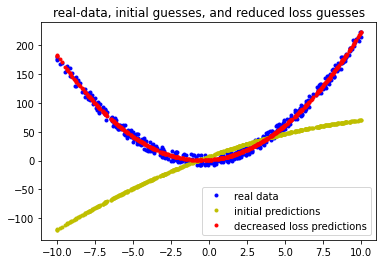

In [25]:
plt.title("real-data, initial guesses, and reduced loss guesses")
plt.plot(realDataPoints[:,0],realDataPoints[:,1],'.b', label='real data')
plt.plot(initialPredictedPoints[:,0],initialPredictedPoints[:,1],'.y', label="initial predictions")
plt.plot(decreasedLossDataPoints[:,0],decreasedLossDataPoints[:,1],'.r', label="decreased loss predictions" )
plt.legend()

In [26]:
print("loss improved by "+str( 100*( initialLoss - losses[-1])/initialLoss ) +" %")
print("loss at "+str(losses[-1]))
print("reduced loss coefs "+str(reducedLossCoefs))

loss improved by 99.60164681702459 %
loss at 34.064080849658794
reduced loss coefs [2.0238710387304977, 1.9896766724954376, 1.1158668933011326]


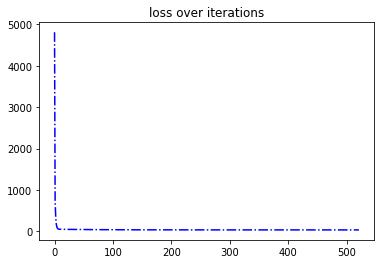

In [27]:
plt.title("loss over iterations")
plt.plot(losses, '-.b')

TASK

Now showing for a cubic polynomial

In [28]:
j = 10
xTrainingValues = makeSampleInputs(100, 10)

In [29]:
coefs = [1,1,1,1]
realDataPoints = np.array(createTestDataPoints(coefs, j, xTrainingValues))


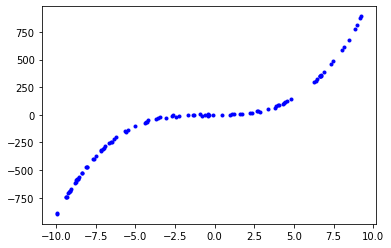

In [30]:
plt.plot(realDataPoints[:,0],realDataPoints[:,1],'.b')

In [31]:
initialGuessCoefs = randomNPlus1thDegPolynom(coefRange, 4)
initialPredictedPoints = np.array(makePlotPoints(initialGuessCoefs, xTrainingValues))

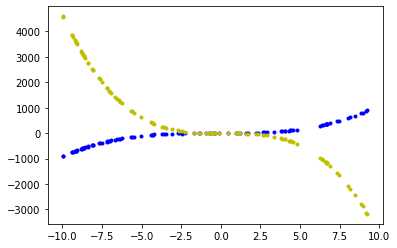

In [32]:
plt.plot(realDataPoints[:,0],realDataPoints[:,1],'.b')
plt.plot(initialPredictedPoints[:,0],initialPredictedPoints[:,1],'.y')

In [33]:
minIterations = 100
learningRate = 0.1
lossMinimisationData = iterateLossMinimisation(minIterations, learningRate, initialGuessCoefs, realDataPoints, initialPredictedPoints)
decreasedLossDataPoints = lossMinimisationData["dataPoints"]
losses = lossMinimisationData["losses"]
reducedLossCoefs = lossMinimisationData["coefs"]
lossMinimisationData = None

loss is at: 32028.06497921379
loss is at: 57.364040414997156
loss is at: 53.940289813121666
loss is at: 51.64080548366606
loss is at: 49.99343202894823
loss is at: 48.73026517504821
loss is at: 47.69902434490566
loss is at: 46.81289377113901
loss is at: 46.02213444412605
loss is at: 45.298017040977854
loss is at: 44.62372780901595
loss is at: 43.98922075443108
loss is at: 43.38830324049954
loss is at: 42.81698560191129
loss is at: 42.27254615736134
loss is at: 41.753001135221545
loss is at: 41.25680379531737
loss is at: 40.7826733002511
loss is at: 40.32949705406813
loss is at: 39.896274654434656
loss is at: 39.48208542950811
loss is at: 39.08606935482154
loss is at: 38.707415573558684
loss is at: 38.34535524963878
loss is at: 37.99915690137384
loss is at: 37.66812316619744
loss is at: 37.3515884013173
loss is at: 37.048916782344946
loss is at: 36.759500707546934
loss is at: 36.48275939781812
loss is at: 36.218137629183005
loss is at: 35.965104561111566
loss is at: 35.72315263895405
lo

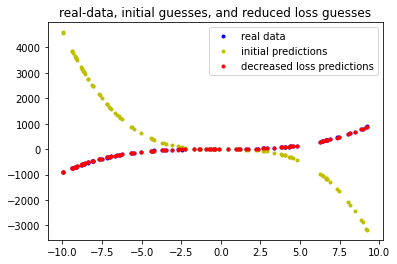

In [34]:
plt.title("real-data, initial guesses, and reduced loss guesses")
plt.plot(realDataPoints[:,0],realDataPoints[:,1],'.b', label='real data')
plt.plot(initialPredictedPoints[:,0],initialPredictedPoints[:,1],'.y', label="initial predictions")
plt.plot(decreasedLossDataPoints[:,0],decreasedLossDataPoints[:,1],'.r', label="decreased loss predictions" )
plt.legend()

In [35]:
print(reducedLossCoefs)
print(losses[-1])
losses = cleanLossData(losses)

[1.004730337785947, 1.0553455650760732, 0.7335696342506796, -0.9474836031952591]
32.69535968424193


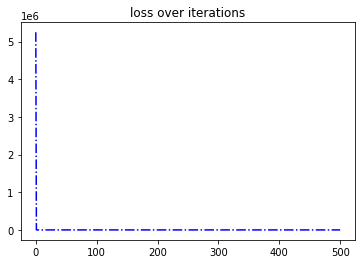

In [36]:
plt.title("loss over iterations")
plt.plot(losses, '-.b')